In [8]:
from __future__ import division
import os, glob, sys
import numpy as np
import itertools
import pandas as pd
from sklearn import svm
from sklearn import metrics


# Get the current working directory
cwd = os.getcwd()
mydir = os.path.abspath(os.path.join(cwd, ".."))
sys.path.append(mydir)
from DataGenerator import genTrainValidFolds

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Provide directories for the models to be saved
STD = "/Users/sam/All-Program/App-DataSet/Kaggle-Challenges/CIFAR-10/Classification-1/STD/Models/SVM"
EDG = "/Users/sam/All-Program/App-DataSet/Kaggle-Challenges/CIFAR-10/Classification-1/EDG/Models/SVM"
HOGp1 = "/Users/sam/All-Program/App-DataSet/Kaggle-Challenges/CIFAR-10/Classification-1/HOGp1/Models/SVM"

modelDir = [STD, EDG, HOGp1]
_ = [os.makedirs(dirct) for dirct in modelDir if not os.path.exists(dirct)]

In [3]:
# Linear SVC with rbf and different gamma values
class Models():

    def __init__(self, type = 'rbf', reg='l2'):
        self.type = type
        self.c_range = [0.1, 1.0, 10.0, 100.0]#, 1000.0]            
        self.gamma_range = [0.1, 1, 10.0]  
        self.kernel="rbf"

    def classify(self, trainData, trainLabels, validData):
        c_range = self.c_range
        gamma_range = self.gamma_range
        kernel = self.kernel
        
        pred_dict = {}
        for (c,gamma) in itertools.product(c_range, gamma_range):
            string = "c" + str(c) + "_" + "gamma" + str(gamma)  
            clf = svm.SVC(kernel=kernel, C=c, gamma=gamma)
            classifier = clf.fit(trainData,trainLabels)
            pred_dict[string] = clf.predict(validData)
        return pred_dict


In [4]:
# Provide the directory of the batches so that we can generate the sequence one after one.
STDbatch_dir = "/Users/sam/All-Program/App-DataSet/Kaggle-Challenges/CIFAR-10/Classification-1/STD/batchData/"
EDGbatch_dir = "/Users/sam/All-Program/App-DataSet/Kaggle-Challenges/CIFAR-10/Classification-1/EDG/batchData/"
HOGp1batch_dir = "/Users/sam/All-Program/App-DataSet/Kaggle-Challenges/CIFAR-10/Classification-1/HOGp1/batchData/"

batchEvalDict = {}
for foldNUM, (trainData, trainLabels, validData, validLabels, labelDict) in enumerate(genTrainValidFolds(HOGp1batch_dir, oneHot=False)):
    print ('Validation Data and Labels shape: ', validData.shape, validLabels.shape)
    print ('Training Data and Labels shape: ', trainData.shape, trainLabels.shape)
    print ('The Label Dictionary is given as: ', labelDict)
    obj_SVM = Models()
#     pred_dict = 
    batchEvalDict[foldNUM] = obj_SVM.classify(trainData, trainLabels, validData)
#     print (pred_dict)
#     break



Running i is : 0
Validation Data and Labels shape:  (1000, 162) (1000,)
Training Data and Labels shape:  (9000, 162) (9000,)
The Label Dictionary is given as:  {0: 'trainDataAirplane.pickle', 1: 'trainDataCat.pickle'}
Running i is : 1
Validation Data and Labels shape:  (1000, 162) (1000,)
Training Data and Labels shape:  (9000, 162) (9000,)
The Label Dictionary is given as:  {0: 'trainDataAirplane.pickle', 1: 'trainDataCat.pickle'}
Running i is : 2
Validation Data and Labels shape:  (1000, 162) (1000,)
Training Data and Labels shape:  (9000, 162) (9000,)
The Label Dictionary is given as:  {0: 'trainDataAirplane.pickle', 1: 'trainDataCat.pickle'}
Running i is : 3
Validation Data and Labels shape:  (1000, 162) (1000,)
Training Data and Labels shape:  (9000, 162) (9000,)
The Label Dictionary is given as:  {0: 'trainDataAirplane.pickle', 1: 'trainDataCat.pickle'}
Running i is : 4
Validation Data and Labels shape:  (1000, 162) (1000,)
Training Data and Labels shape:  (9000, 162) (9000,)
The

In [10]:
def confusionMatrix(predDict):
    tot = len(predDict)
    columns = 4
    rows = int(np.ceil(tot/columns))
    fig1, axs = plt.subplots(rows,columns, figsize=(30, 15), facecolor='y', edgecolor='k')
    axs = axs.ravel()
    for num, (hparam, estimate) in enumerate(predDict.items()):
        cmatArr = pd.crosstab(validLabels, estimate, rownames=['True'], colnames=['Predicted'], margins=True)
        sns.heatmap(cmatArr, annot=True, fmt="g", ax=axs[num])
        axs[num].set_title(hparam)
          

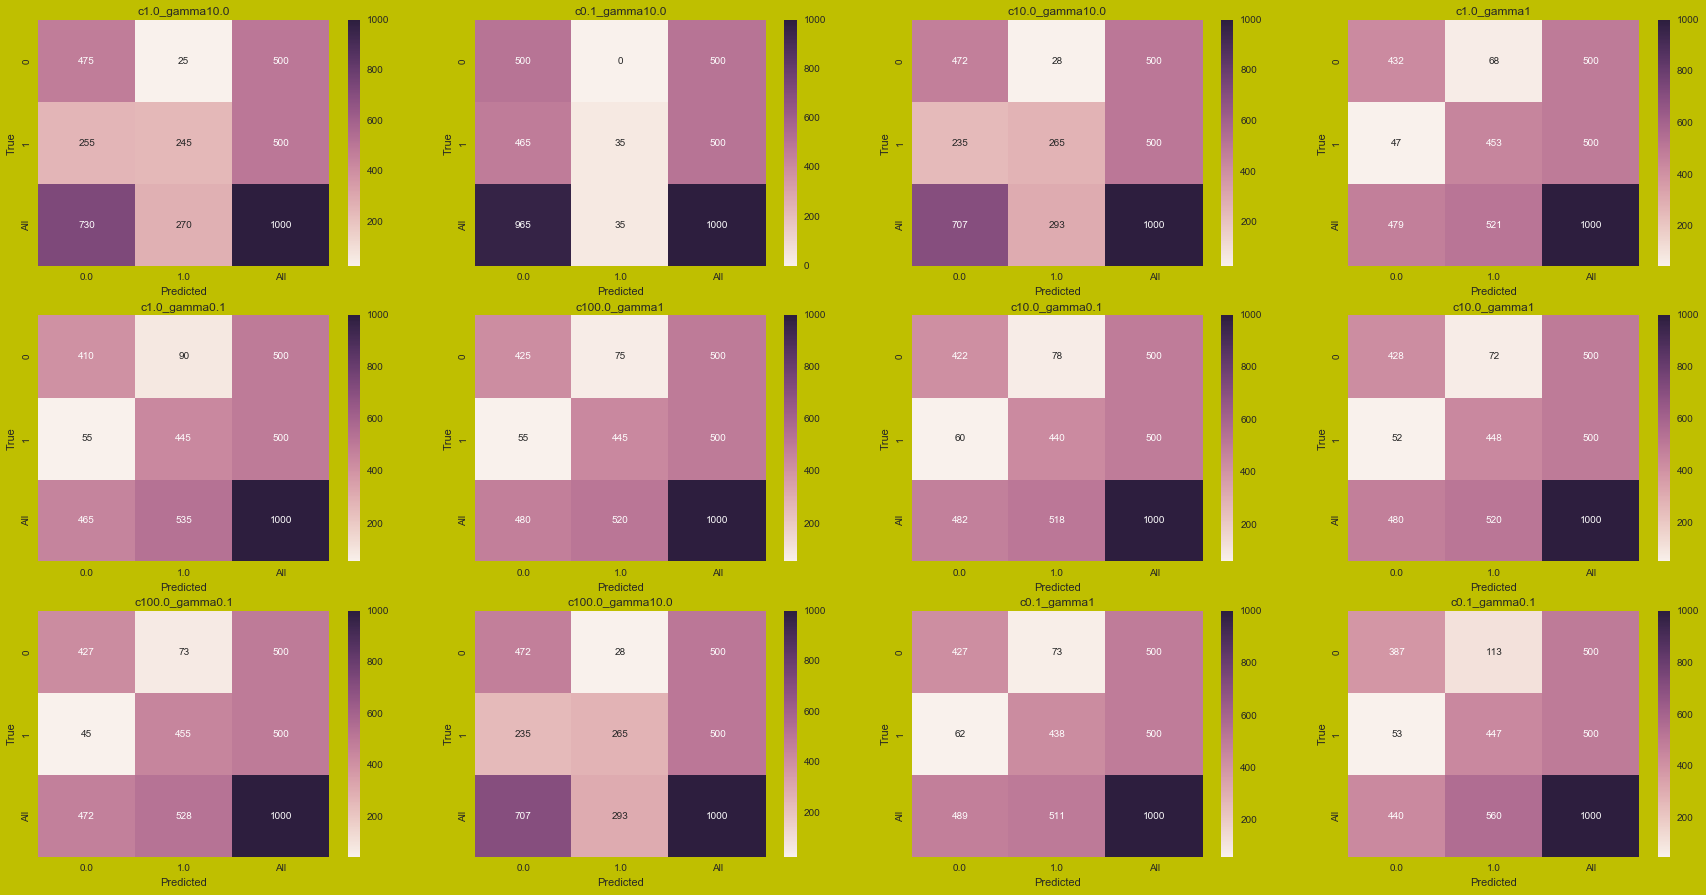

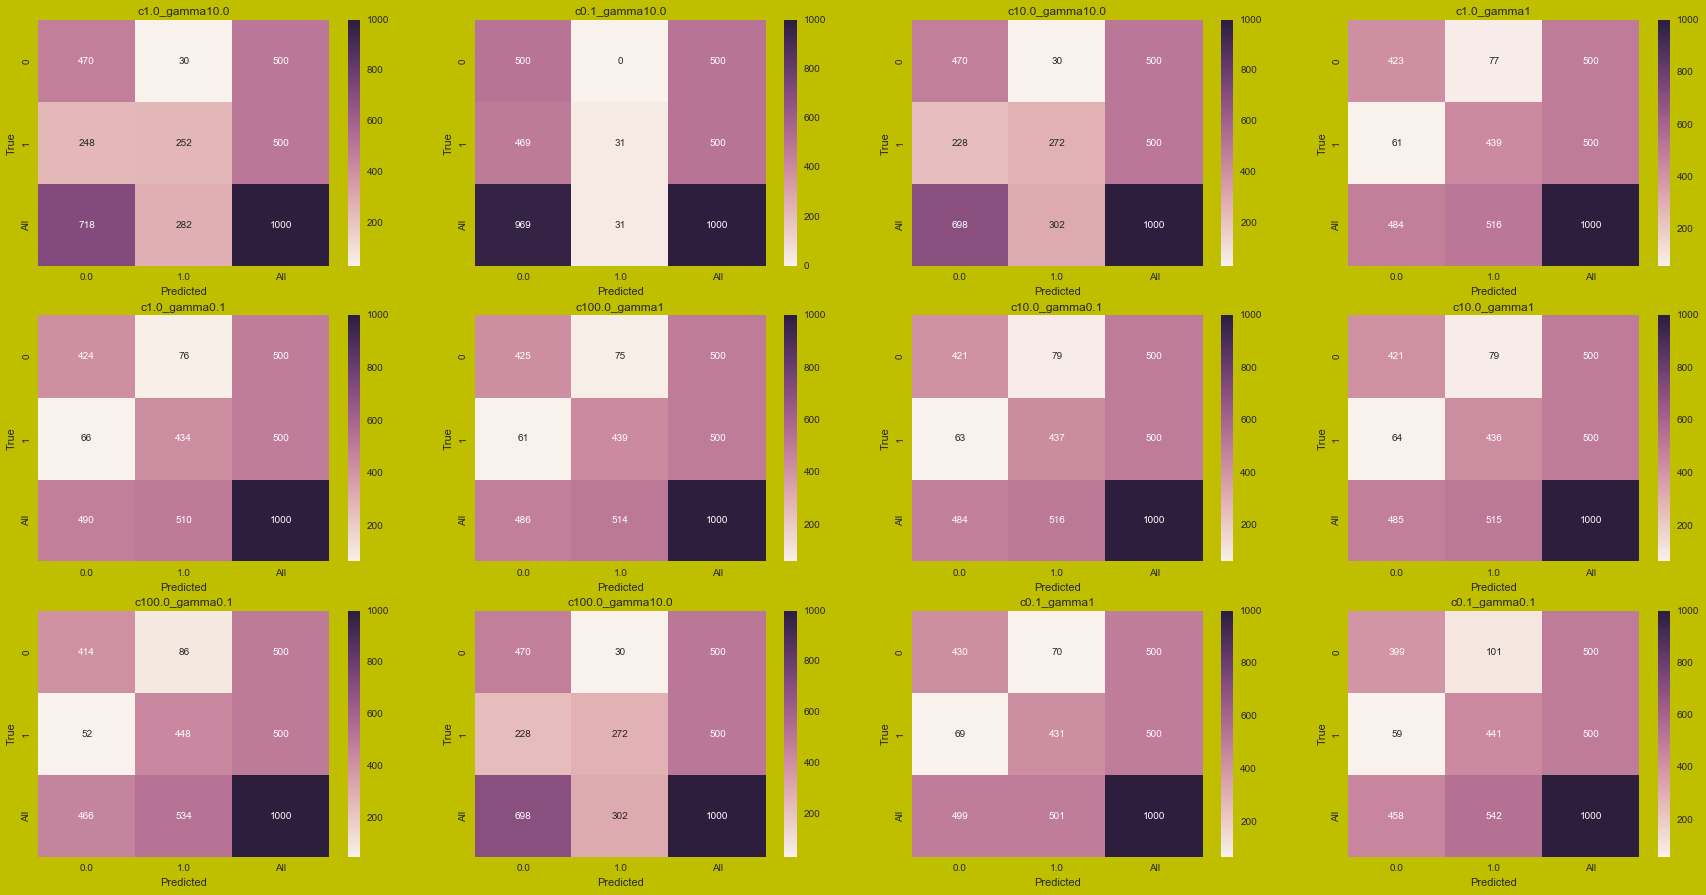

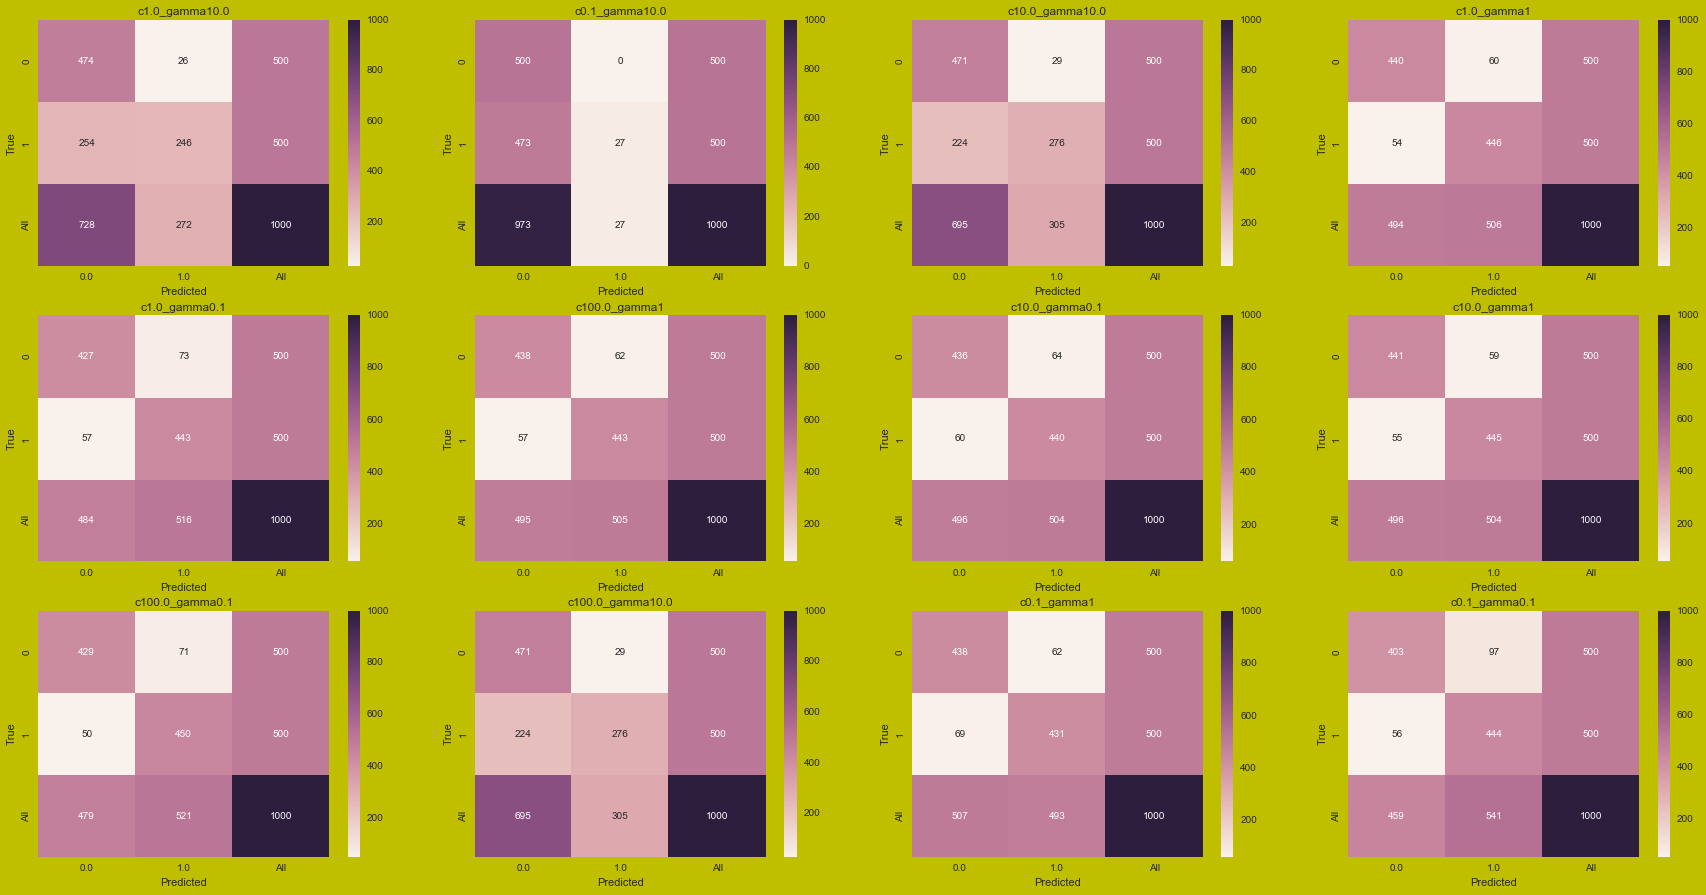

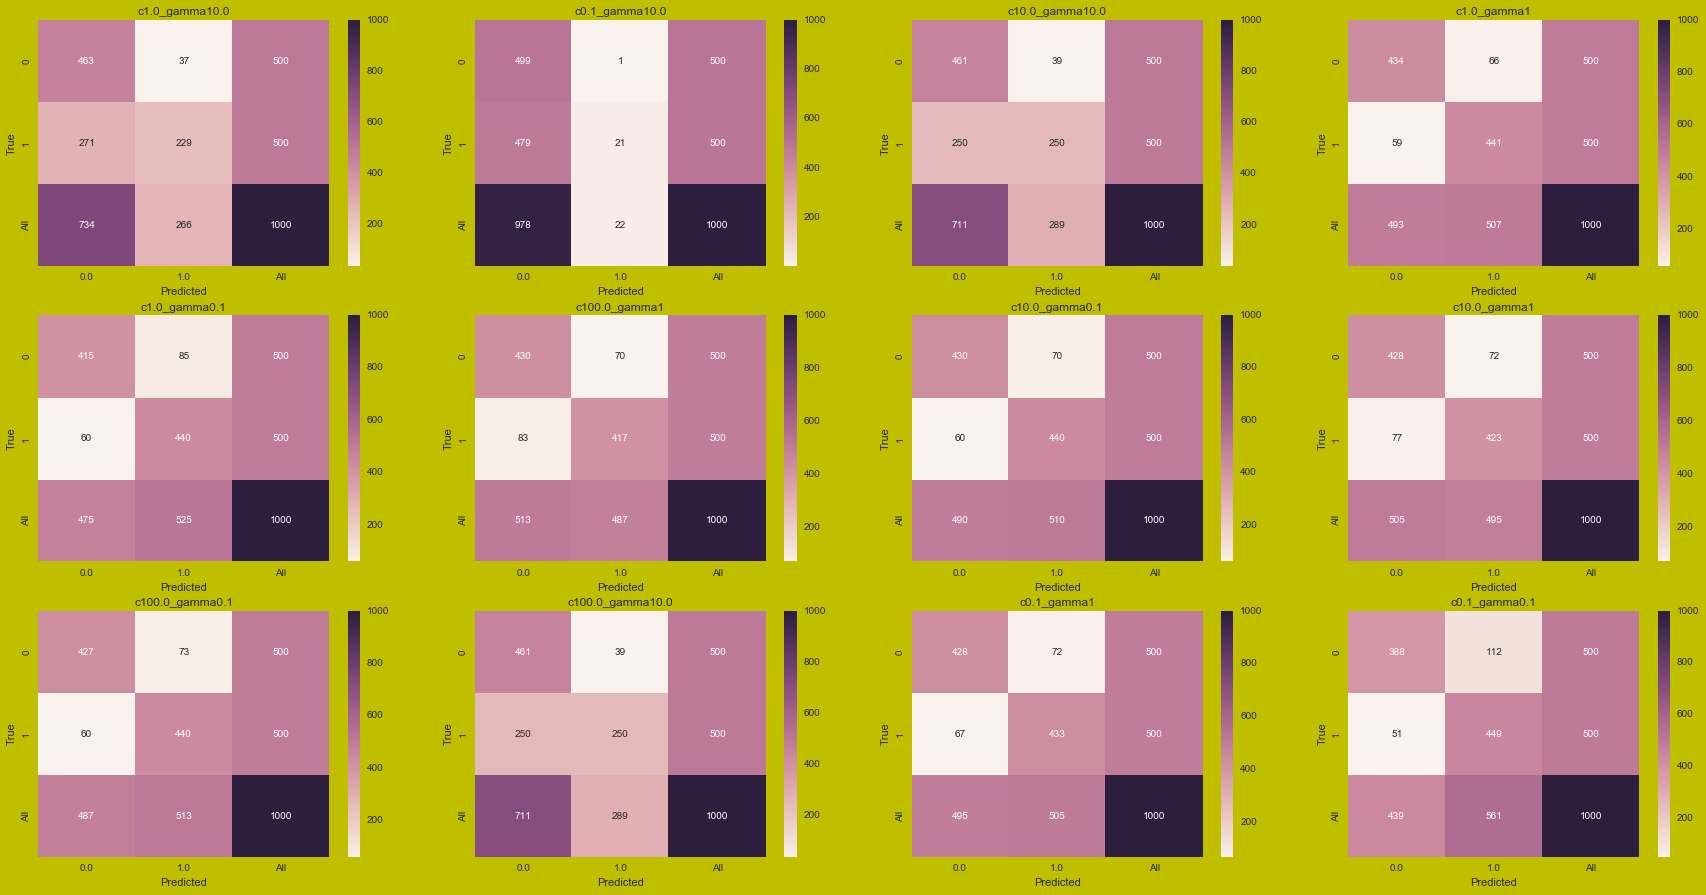

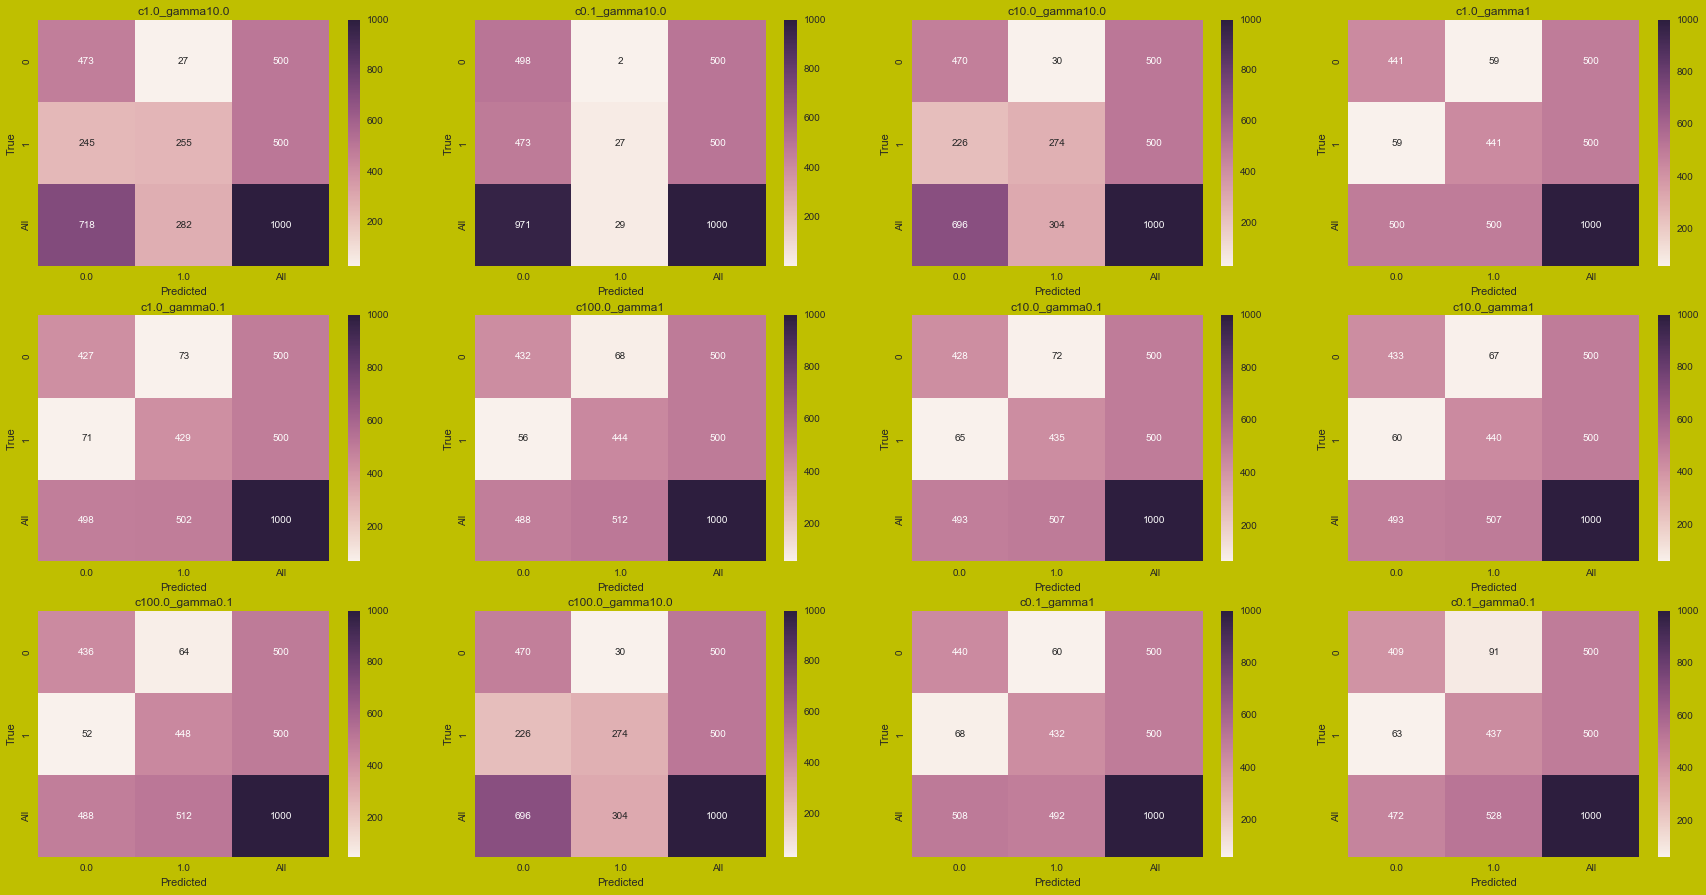

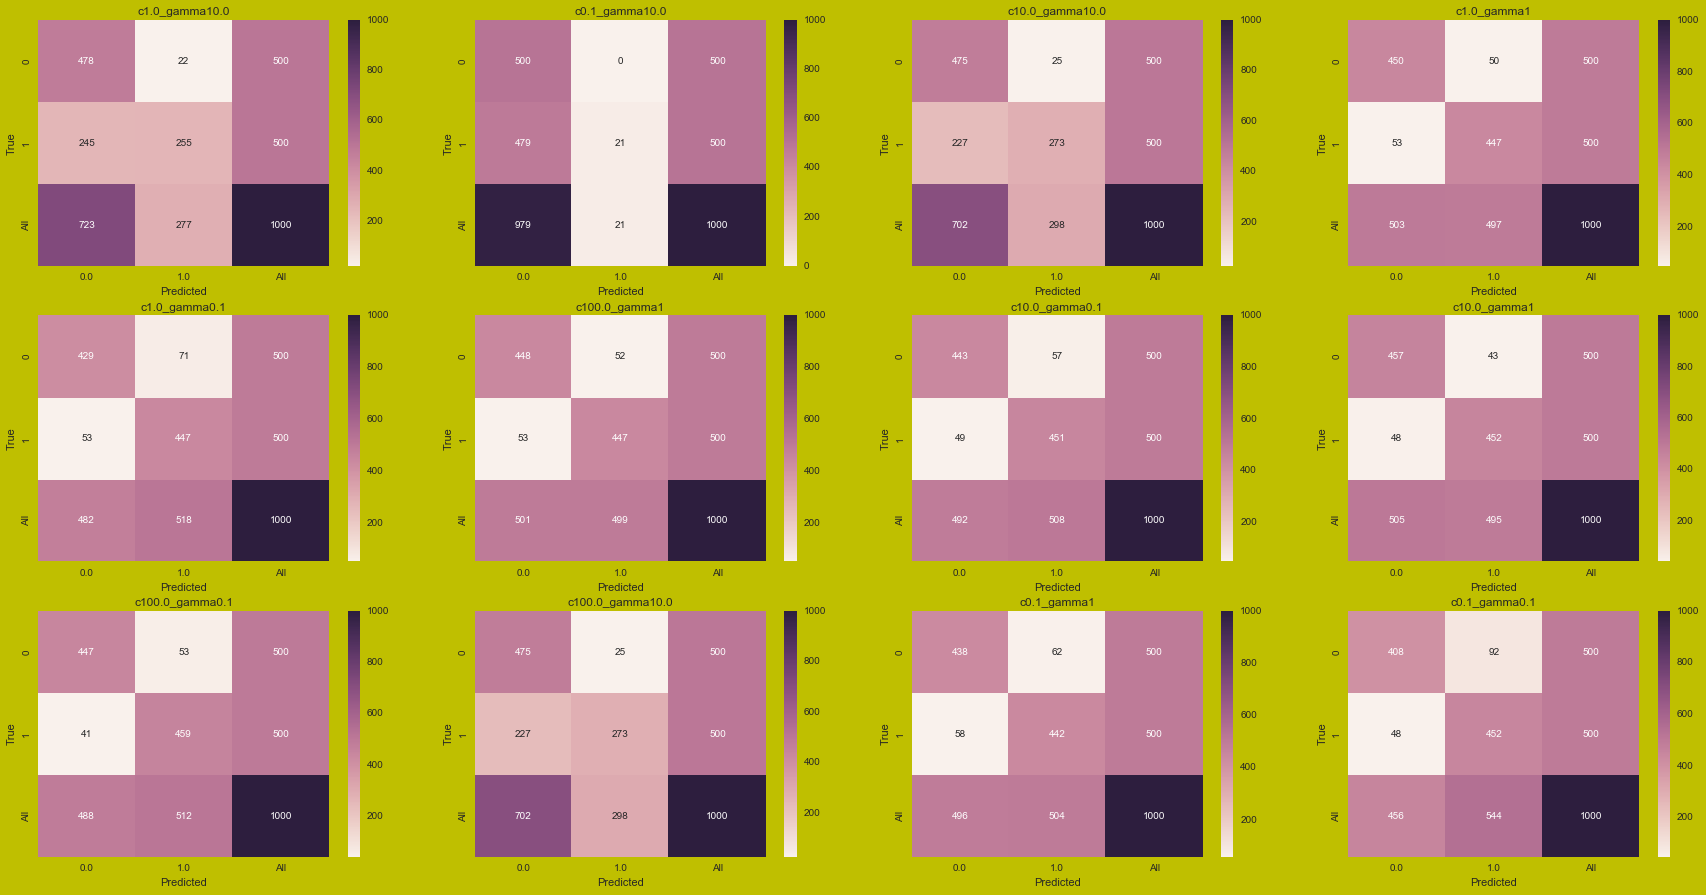

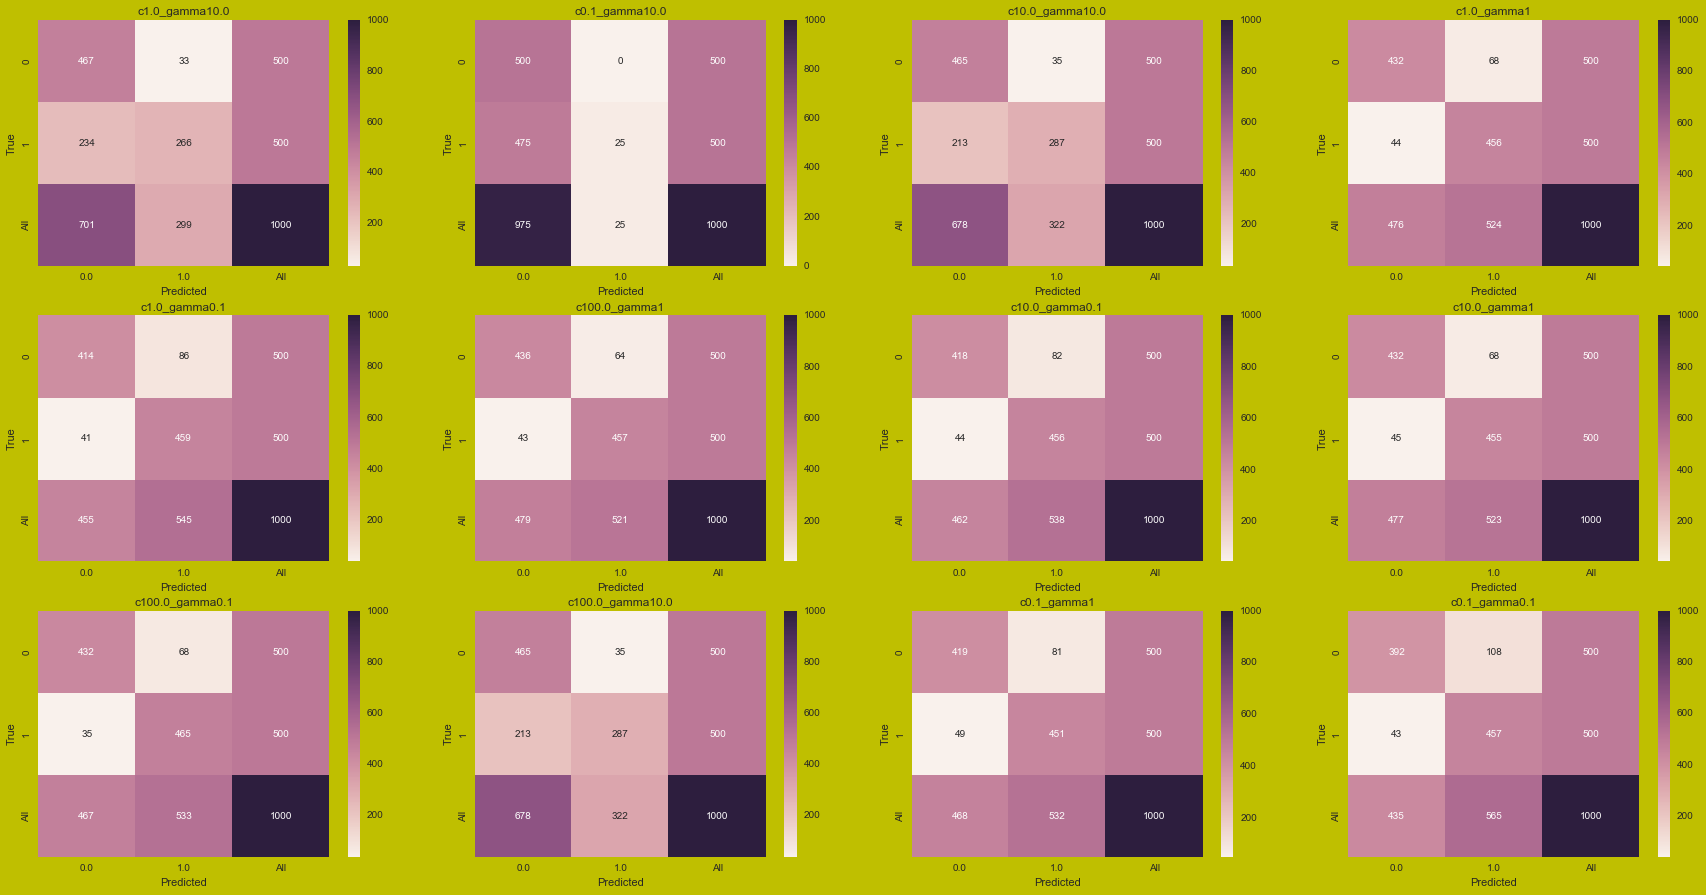

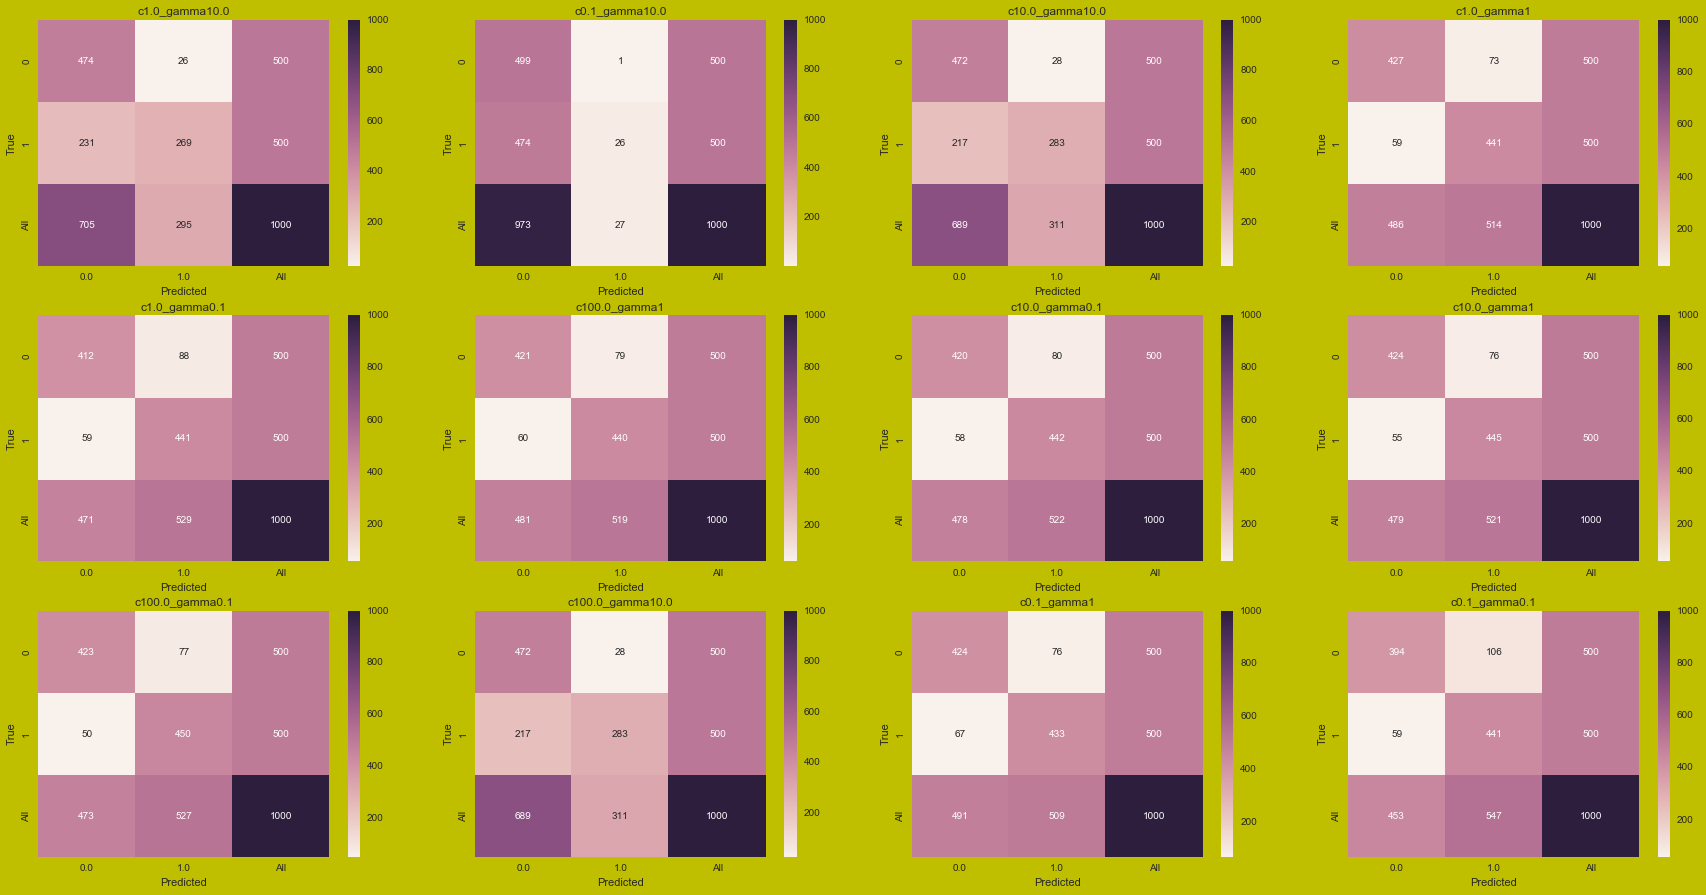

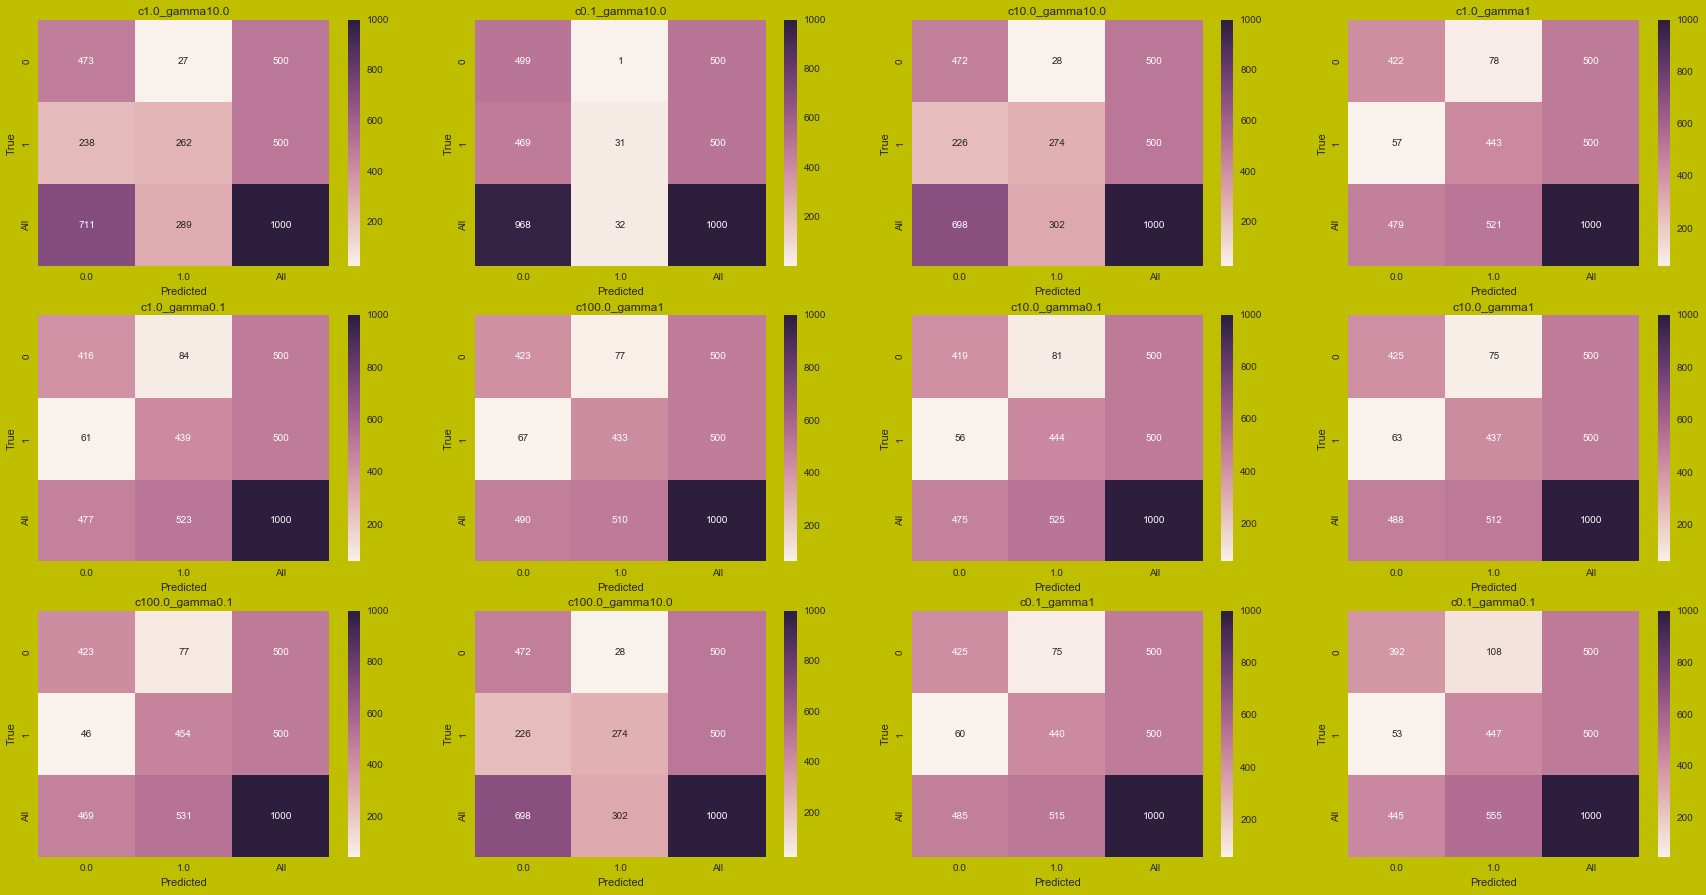

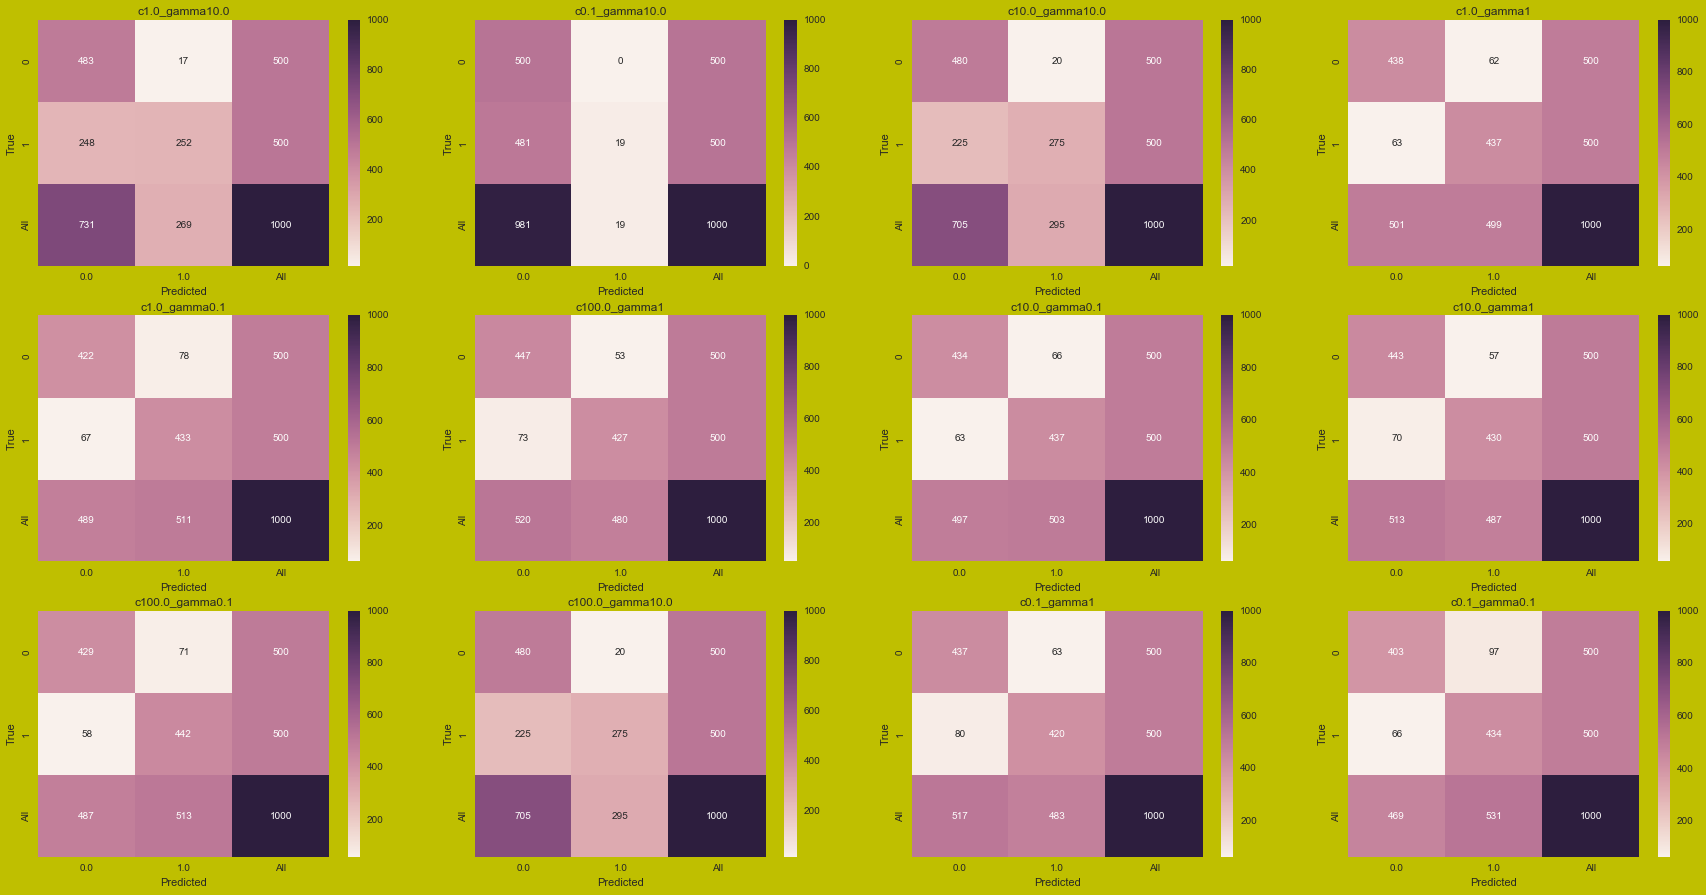

In [11]:
for foldNUM, predDict in batchEvalDict.items():       
    confusionMatrix(predDict)

#     break
#     print (opt)